In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

In [19]:
df = pd.read_csv(r"Superstore Sales Dataset.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

In [26]:
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum()
monthly_sales

Order Date
2015-01-31     14205.7070
2015-02-28      4519.8920
2015-03-31     55205.7970
2015-04-30     27906.8550
2015-05-31     23644.3030
2015-06-30     34322.9356
2015-07-31     33781.5430
2015-08-31     27117.5365
2015-09-30     81623.5268
2015-10-31     31453.3930
2015-11-30     77907.6607
2015-12-31     68167.0585
2016-01-31     18066.9576
2016-02-29     11951.4110
2016-03-31     32339.3184
2016-04-30     34154.4685
2016-05-31     29959.5305
2016-06-30     23599.3740
2016-07-31     28608.2590
2016-08-31     36818.3422
2016-09-30     63133.6060
2016-10-31     31011.7375
2016-11-30     75249.3995
2016-12-31     74543.6012
2017-01-31     18542.4910
2017-02-28     22978.8150
2017-03-31     51165.0590
2017-04-30     38679.7670
2017-05-31     56656.9080
2017-06-30     39724.4860
2017-07-31     38320.7830
2017-08-31     30542.2003
2017-09-30     69193.3909
2017-10-31     59583.0330
2017-11-30     79066.4958
2017-12-31     95739.1210
2018-01-31     43476.4740
2018-02-28     19920.9974
2

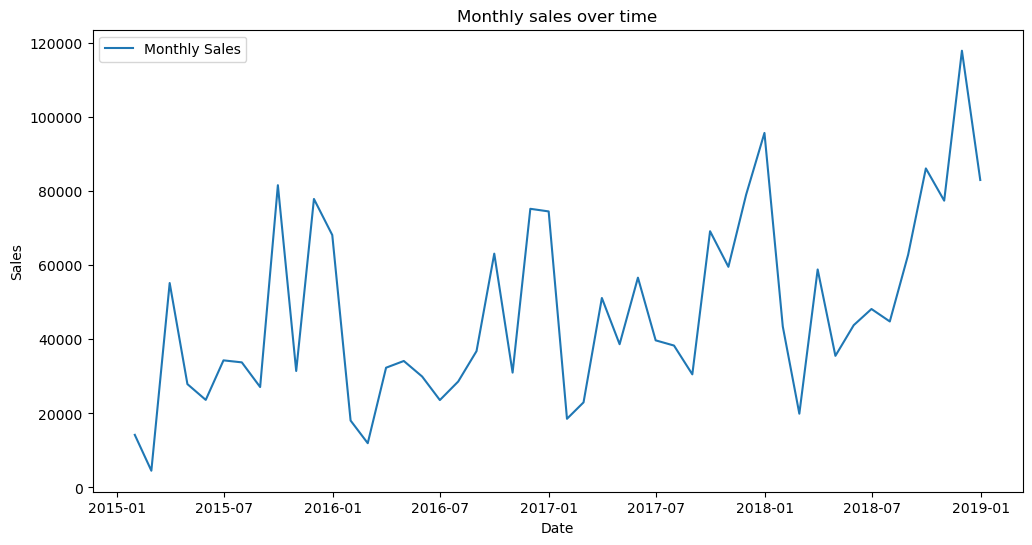

In [27]:
plt.figure(figsize=(12,6))

plt.plot(monthly_sales, label = 'Monthly Sales')
plt.title("Monthly sales over time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

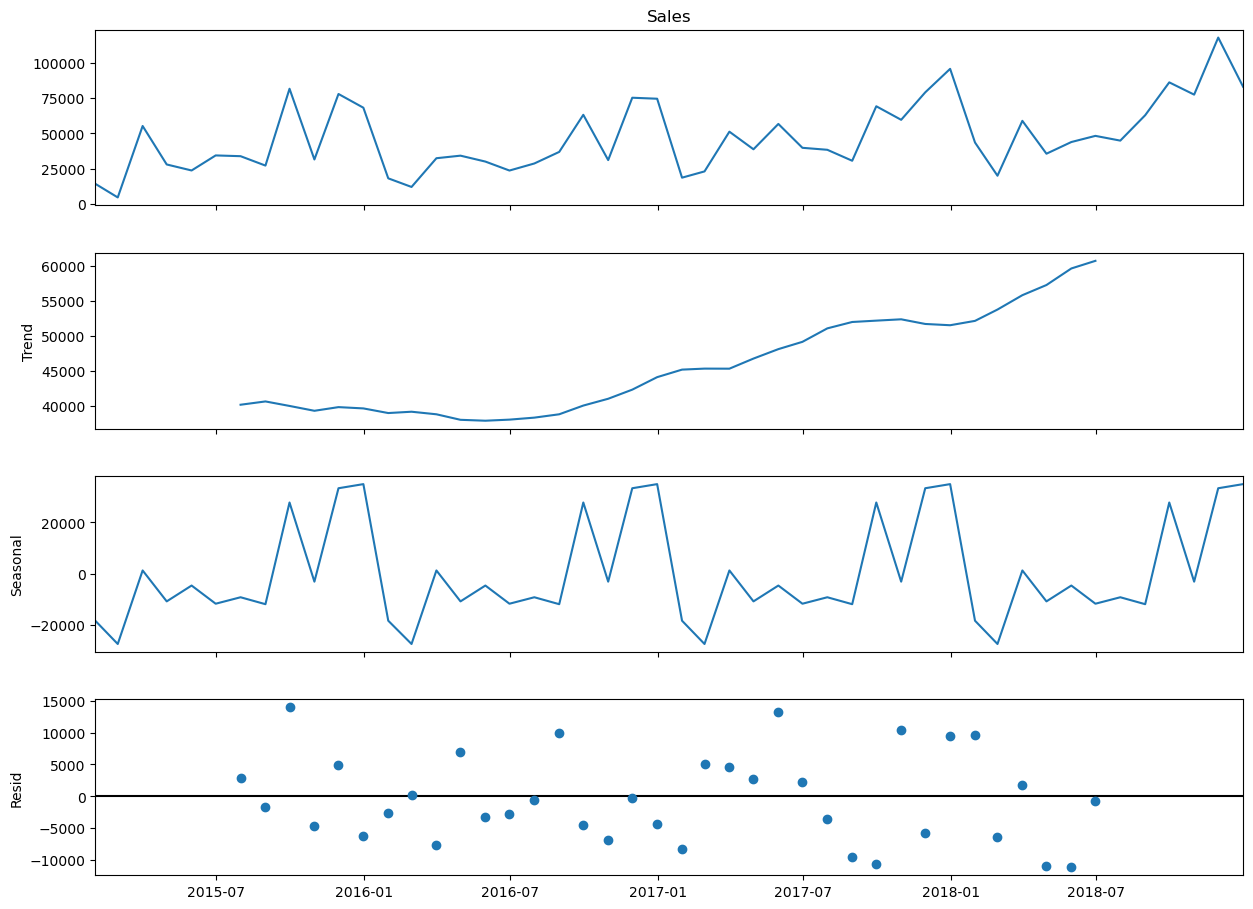

In [67]:
decomposition = seasonal_decompose(monthly_sales, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14,10)
plt.show()

In [31]:
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey-Fuller Test Result: ")
    print("ADF Statitics: ", result[0])
    print("p-value: ", result[1])
    print("Critical value: ")
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    return result[1] < 0.05

is_stationary = check_stationarity(monthly_sales)
print(f"\nTime series is {'stationary' if is_stationary  else 'non=stationary'}")

Augmented Dickey-Fuller Test Result: 
ADF Statitics:  -4.41613676143077
p-value:  0.00027791039276670493
Critical value: 
	1%: -3.5778480370438146
	5%: -2.925338105429433
	10%: -2.6007735310095064

Time series is stationary


In [32]:
auto_model = auto_arima(
    monthly_sales,
    start_p = 0,
    start_q = 0,
    max_p = 5,
    max_q = 5,
    m=12,
    seasonal=True,
    d = None,
    trace = True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1085.632, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1096.560, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1076.500, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1077.487, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1094.708, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1089.579, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1078.250, Time=0.14 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1078.452, Time=0.10 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1080.901, Time=0.06 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1079.864, Time=0.21 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1084.035, Time=0.04 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.635, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1087.151, Time=0.03 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1075.267, Time=0.17 sec
 ARIMA(2,1,0)(1,0,1

In [34]:
model = ARIMA(
    monthly_sales,
    order = auto_model.order,
    seasonal_order = auto_model.seasonal_order
)

result = model.fit()

In [36]:
forcast_period = 12
forcast = result.get_forecast(steps=forcast_period)
mean_forcast = forcast.predicted_mean

In [37]:
conf_int_95 = forcast.conf_int(alpha=0.05)
conf_int_80 = forcast.conf_int(alpha=0.20)
conf_int_70 = forcast.conf_int(alpha=0.30)

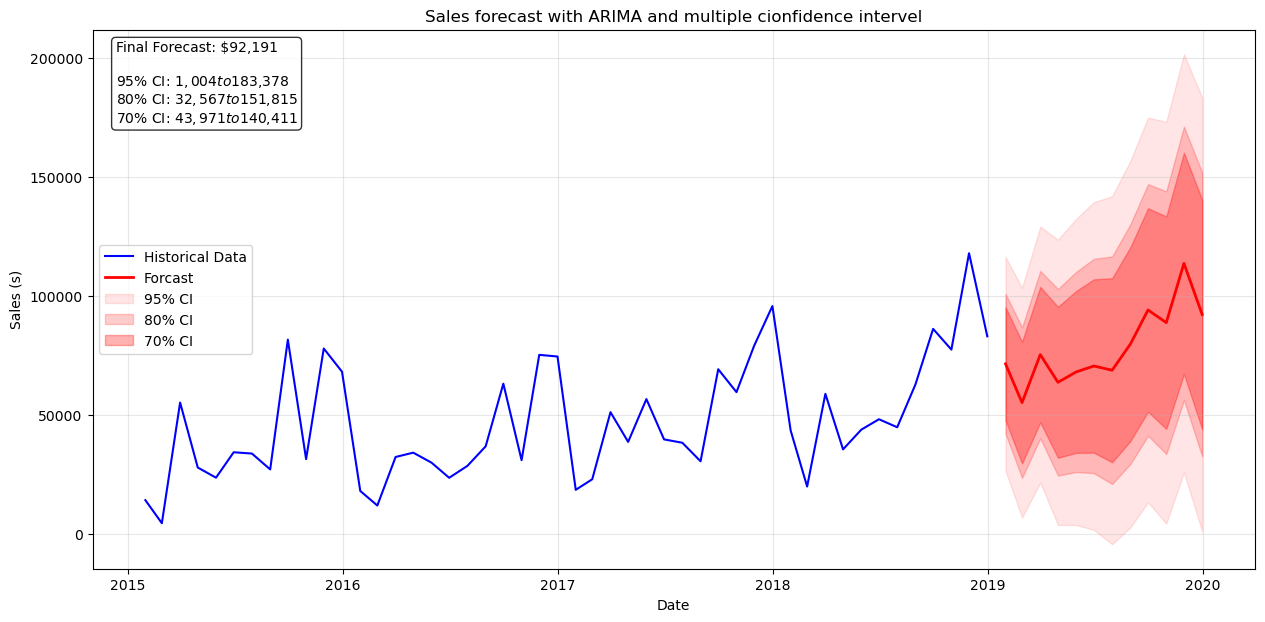

In [45]:
plt.figure(figsize=(15,7))

#plot historical data aand forcast
plt.plot(monthly_sales, label = 'Historical Data', color = 'blue')
plt.plot(mean_forcast, label = 'Forcast', color = 'red', linewidth=2)

# plot confidence intervel
plt.fill_between(
    mean_forcast.index,
    conf_int_95.iloc[:, 0],
    conf_int_95.iloc[:, 1],
    color='red',
    alpha=0.1,
    label='95% CI'
)

plt.fill_between(
    mean_forcast.index,
    conf_int_80.iloc[:, 0],
    conf_int_80.iloc[:, 1],
    color='red',
    alpha=0.2,
    label='80% CI'
)

plt.fill_between(
    mean_forcast.index,
    conf_int_70.iloc[:, 0],
    conf_int_70.iloc[:, 1],
    color='red',
    alpha=0.3,
    label='70% CI'
)

plt.title("Sales forecast with ARIMA and multiple cionfidence intervel")
plt.xlabel("Date")
plt.ylabel("Sales (s)")
plt.legend()
plt.grid(True, alpha=0.3)

#get final values
last_forcast = mean_forcast.iloc[-1]
range_95_lower = conf_int_95.iloc[-1, 0]
range_95_upper = conf_int_95.iloc[-1, 1]
range_80_lower = conf_int_80.iloc[-1, 0]
range_80_upper = conf_int_80.iloc[-1, 1]
range_70_lower = conf_int_70.iloc[-1, 0]
range_70_upper = conf_int_70.iloc[-1, 1]

# createe info text
info_text = f"Final Forecast: ${last_forcast:,.0f}\n\n" \
            f'95% CI: ${range_95_lower:,.0f} to ${range_95_upper:,.0f}\n' \
            f'80% CI: ${range_80_lower:,.0f} to ${range_80_upper:,.0f}\n' \
            f'70% CI: ${range_70_lower:,.0f} to ${range_70_upper:,.0f}' 
plt.text(
    0.02, 0.98, info_text,
    transform = plt.gca().transAxes,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.show()

In [47]:
# Calculate and display metrix

print("\nModel Performance: ")

mse = mean_squared_error(monthly_sales, result.fittedvalues)
rmse = np.sqrt(mse)
mae = mean_absolute_error(monthly_sales, result.fittedvalues)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# print forcast information
print("\nForecast Ranges for final period")
print(f"Final Forecast: ${last_forcast:,.2f}") 
print(f'95% CI: ${range_95_lower:,.2f} to ${range_95_upper:,.2f}')
print(f'80% CI: ${range_80_lower:,.2f} to ${range_80_upper:,.2f}') 
print(f'70% CI: ${range_70_lower:,.2f} to ${range_70_upper:,.2f}') 

# calculate and prin intervel
print("\nIntervel  width as percentage of Forecast: ")
print(f"95% CI : ±{((range_95_upper - range_95_lower) / 2 / last_forcast * 100):,.1f}%")
print(f"80% CI : ±{((range_80_upper - range_80_lower) / 2 / last_forcast * 100):,.1f}%")
print(f"70% CI : ±{((range_70_upper - range_70_lower) / 2 / last_forcast * 100):,.1f}%")

# create forcast dataframe
forcast_df = pd.DataFrame({
    'Forecast': mean_forcast,
    '95% Lower': conf_int_95.iloc[-1, 0],
    '95% Upper' : conf_int_95.iloc[-1, 1],
    '80% Lower' : conf_int_80.iloc[-1, 0],
    '80% Upper' : conf_int_80.iloc[-1, 1],
    '70% Lower' : conf_int_70.iloc[-1, 0],
    '80% Upper' : conf_int_70.iloc[-1, 1]
})

print("\nDetailed Forecast with confidence Intervals: ")
print(forcast_df)


Model Performance: 
Mean Squared Error (MSE): 372198461.44
Root Mean Squared Error (RMSE): 19292.45
Mean Absolute Error (MAE): 14432.38

Forecast Ranges for final period
Final Forecast: $92,191.07
95% CI: $1,003.72 to $183,378.42
80% CI: $32,566.87 to $151,815.28
70% CI: $43,970.99 to $140,411.15

Intervel  width as percentage of Forecast: 
95% CI : ±98.9%
80% CI : ±64.7%
70% CI : ±52.3%

Detailed Forecast with confidence Intervals: 
                 Forecast    95% Lower      95% Upper     80% Lower  \
2019-01-31   71457.294783  1003.720946  183378.424979  32566.868306   
2019-02-28   55170.675737  1003.720946  183378.424979  32566.868306   
2019-03-31   75354.273350  1003.720946  183378.424979  32566.868306   
2019-04-30   63712.967969  1003.720946  183378.424979  32566.868306   
2019-05-31   68065.122583  1003.720946  183378.424979  32566.868306   
2019-06-30   70562.386168  1003.720946  183378.424979  32566.868306   
2019-07-31   68781.958322  1003.720946  183378.424979  32566.868

In [49]:
models= []
specifications =[
    {
        'name': 'Fixed Parameters',
        'model': ExponentialSmoothing(
            monthly_sales,
            seasonal_periods=12,
            trend='add',
            seasonal='add',
            damped_trend=True
        ).fit(
            smoothing_level=0.2,
            smoothing_trend=0.1,
            smoothing_seasonal=0.1,
            damping_trend=0.98,
            optimized=False
        )
    },
        {
        'name': 'Multiplicative Seasonal',
        'model': ExponentialSmoothing(
            monthly_sales,
            seasonal_periods=12,
            trend='add',
            seasonal='mul',
            damped_trend=True
        ).fit(
            smoothing_level=0.2,
            smoothing_trend=0.1,
            smoothing_seasonal=0.1,
            damping_trend=0.98,
            optimized=False
        )
    },
     {
        'name': 'Multiplicative Trend',
        'model': ExponentialSmoothing(
            monthly_sales,
            seasonal_periods=12,
            trend='mul',
            seasonal='add',
            damped_trend=True
        ).fit(
            smoothing_level=0.2,
            smoothing_trend=0.1,
            smoothing_seasonal=0.1,
            damping_trend=0.98,
            optimized=False
        )
    }
]

In [52]:
results = []
for spec in specifications:
    model = spec['model']
    name = spec['name']

    # Calculated metrics
    rmse = np.sqrt(mean_squared_error(monthly_sales, model.fittedvalues))
    mae = mean_absolute_error(monthly_sales, model.fittedvalues)

    results.append({
        'name': name,
        'rmse': rmse,
        'mae' : mae,
        'model': model
    })

In [60]:
best_model = min(results, key = lambda x: x['rmse'])
hw_model = best_model['model']
hw_forcast = hw_model.forecast(12)

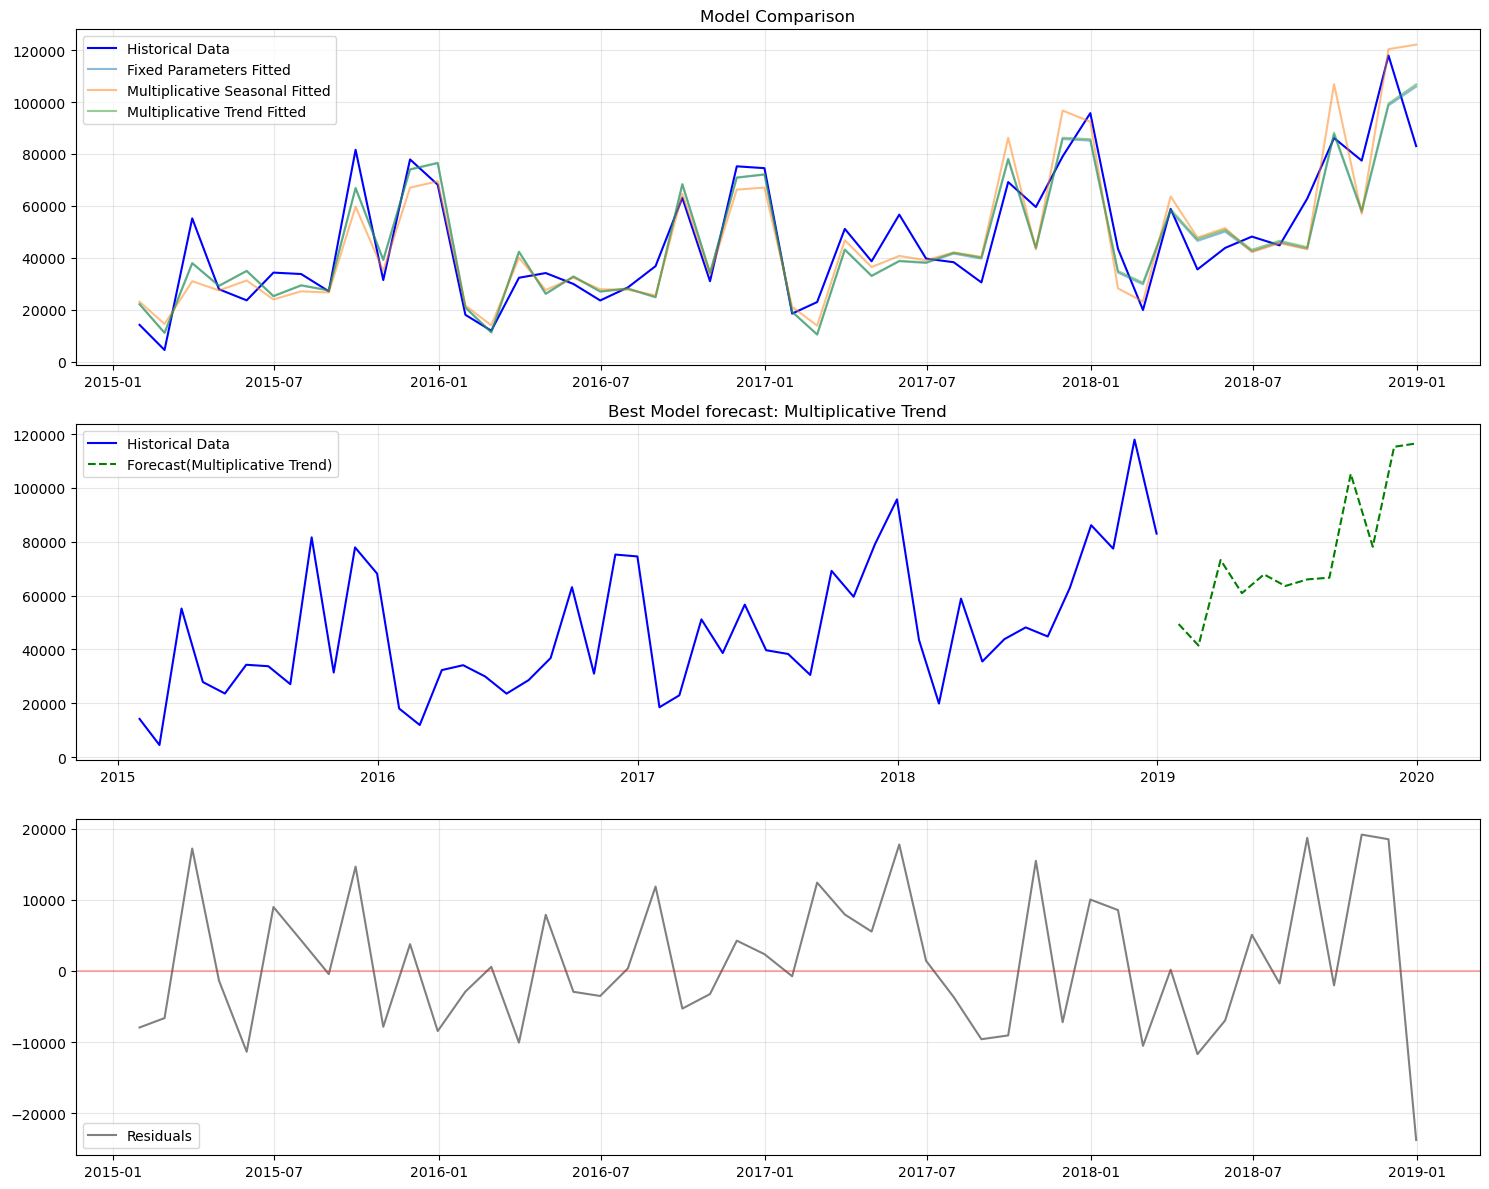

In [61]:
plt.figure(figsize=(15,12))

# first subplot: All models
plt.subplot(3,1,1)
plt.plot(monthly_sales.index, monthly_sales, label='Historical Data', color = 'blue')
for result in results:
    plt.plot(
        result['model'].fittedvalues.index,
        result['model'].fittedvalues,
        label = f'{result['name']} Fitted',
        alpha =0.5
    )
plt.title('Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Second subplot: Best model forcast
plt.subplot(3,1,2)
plt.plot(monthly_sales.index, monthly_sales, label='Historical Data', color = 'blue')
plt.plot(
    hw_forcast.index, 
    hw_forcast,
    label = f'Forecast({best_model['name']})',
    color = 'green',
    linestyle='--'
)
plt.title(f'Best Model forecast: {best_model["name"]}')
plt.legend()
plt.grid(True, alpha=0.3)

# Thrid subplot : Residual of best model
plt.subplot(3,1,3)
resudals = monthly_sales - hw_model.fittedvalues
plt.plot(monthly_sales.index, resudals, label='Residuals', color='gray')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [62]:
print("\n Model comparison")
for result in results:
    print(f"\n{result['name']}:")
    print(f'RMSE: ${result['rmse']:.2f}')
    print(f'MAE: ${result['mae']:.2f}')

print(f"\nBest Model: {best_model['name']}")
print(f"\nBest RMSE: {best_model['rmse']:.2f}")


 Model comparison

Fixed Parameters:
RMSE: $9783.60
MAE: $7831.27

Multiplicative Seasonal:
RMSE: $11758.67
MAE: $8762.04

Multiplicative Trend:
RMSE: $9762.29
MAE: $7841.90

Best Model: Multiplicative Trend

Best RMSE: 9762.29


In [63]:
print("\nBest Model Parameters:")
print(f"- Smoothing level (a): {hw_model.params['smoothing_level']:.3f}")
print(f"- Trend smoothing (B): {hw_model.params['smoothing_trend']:.3f}")
print(f"- Seasonal smoothing (y): {hw_model.params['smoothing_seasonal']:.3f}")
print(f"- Damping parameter (φ): {hw_model.params['damping_trend']:.3f}")


Best Model Parameters:
- Smoothing level (a): 0.200
- Trend smoothing (B): 0.100
- Seasonal smoothing (y): 0.100
- Damping parameter (φ): 0.980


In [64]:
hw_forcast

2019-01-31     49435.711479
2019-02-28     41459.506838
2019-03-31     73220.555712
2019-04-30     60904.078997
2019-05-31     67886.536597
2019-06-30     63574.157506
2019-07-31     66020.931715
2019-08-31     66663.177848
2019-09-30    105201.488326
2019-10-31     78140.769889
2019-11-30    115255.953319
2019-12-31    116513.155267
Freq: ME, dtype: float64

In [66]:
final_result = pd.DataFrame({
    'Actual': monthly_sales,
    'Fitted': hw_model.fittedvalues,
    'Residuals': resudals
})
final_result

,Actual,Fitted,Residuals
Order Date,,,
2015-01-31,14205.7070,22155.386037,-7949.679037
2015-02-28,4519.8920,11146.811114,-6626.919114
2015-03-31,55205.7970,37975.018760,17230.778240
2015-04-30,27906.8550,29267.192066,-1360.337066
2015-05-31,23644.3030,35011.240872,-11366.937872
2015-06-30,34322.9356,25323.862069,8999.073531
2015-07-31,33781.5430,29471.746667,4309.796333
2015-08-31,27117.5365,27556.862748,-439.326248
2015-09-30,81623.5268,66942.870651,14680.656149
